# matrix fold of gate XOR

In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
sys.path.append('../../../Transferências/qiskit-sdk-py-master')

if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')

import qiskit
import numpy

# Import the QISKit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QuantumProgram, Result
from qiskit import available_backends, execute, register, get_backend
import getpass, time
import Qconfig
from qiskit import compile


# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

#information of API
from IBMQuantumExperience import IBMQuantumExperience

# Import tomography tools
import qiskit.tools.qcvv.tomography as tomo

# Aditional packages
from qiskit.tools.qi.qi import *

In [2]:
api = IBMQuantumExperience(Qconfig.APItoken)
myCredits = api.get_my_credits()

print(myCredits)

# set the APIToken and API url
try:
    register(Qconfig.APItoken,Qconfig.config['url'])

    print('\nYou have access to great power!')
    print(available_backends({'local': False, 'simulator': False}))
    print('Available simulators:')
    print(available_backends({'simulator':True}))
except: 
    print('Something went wrong.\nDid you enter a correct token?')

{'maxUserType': 15, 'promotional': 0, 'remaining': 12}

You have access to great power!
['ibmq_16_rueschlikon', 'ibmq_5_tenerife', 'ibmq_5_yorktown']
Available simulators:
['ibmq_qasm_simulator', 'local_qasm_simulator', 'local_statevector_simulator', 'local_unitary_simulator']


In [3]:
# Creating Programs
# create QuantumProgram object instance.
qp = QuantumProgram()

# Creating Registers
# create Quantum Register called "qr" with 7 qubits 
qr = qp.create_quantum_register('qr', 7)
# create Classical Register  called "cr" with 7 bits
cr = qp.create_classical_register('cr', 7)

# Creating Circuits
# create Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = qp.create_circuit('Circuit', [qr], [cr])

In [4]:
# Get the components.

# get the circuit by Name
circuit = qp.get_circuit('Circuit')

# get the Quantum Register by Name
quantum_r = qp.get_quantum_register('qr')

# get the Classical Register by Name
classical_r = qp.get_classical_register('cr')

In [5]:
#preparing qubits

# the circuit we want:
qc.h(qr[5])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[0])
qc.tdg(qr[1])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[5],qr[1])
qc.h(qr[5])
qc.h(qr[6])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.t(qr[2])
qc.tdg(qr[3])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[6])
qc.t(qr[3])
qc.cx(qr[6],qr[3])
qc.h(qr[6])
qc.h(qr[4])
qc.t(qr[4])
qc.t(qr[5])
qc.t(qr[6])
qc.cx(qr[5],qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.tdg(qr[5])
qc.t(qr[4])
qc.cx(qr[6],qr[5])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.cx(qr[5],qr[6])
qc.h(qr[4])
qc.h(qr[6])
qc.cx(qr[6],qr[3])
qc.tdg(qr[3])
qc.t(qr[6])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.t(qr[3])
qc.tdg(qr[2])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.h(qr[6])
qc.h(qr[5])
qc.cx(qr[5],qr[1])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.t(qr[1])
qc.tdg(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.h(qr[5])
qc.barrier(qr[5])
qc.h(qr[5])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[0])
qc.tdg(qr[1])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[5],qr[1])
qc.h(qr[5])
qc.barrier(qr[6])
qc.h(qr[6])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.t(qr[2])
qc.t(qr[3])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[6])
qc.tdg(qr[3])
qc.cx(qr[6],qr[3])
qc.h(qr[6])
qc.h(qr[4])
qc.t(qr[4])
qc.t(qr[5])
qc.t(qr[6])
qc.cx(qr[5],qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.tdg(qr[5])
qc.t(qr[4])
qc.cx(qr[6],qr[5])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.cx(qr[5],qr[6])
qc.h(qr[4])
qc.h(qr[6])
qc.cx(qr[6],qr[3])
qc.t(qr[3])
qc.t(qr[6])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.tdg(qr[3])
qc.tdg(qr[2])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.h(qr[6])
qc.h(qr[5])
qc.cx(qr[5],qr[1])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.t(qr[1])
qc.tdg(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.h(qr[5])
qc.barrier(qr[5])
qc.h(qr[5])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[0])
qc.t(qr[1])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[5])
qc.tdg(qr[1])
qc.cx(qr[5],qr[1])
qc.h(qr[5])
qc.barrier(qr[6])
qc.h(qr[6])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.t(qr[2])
qc.t(qr[3])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[6])
qc.tdg(qr[3])
qc.cx(qr[6],qr[3])
qc.h(qr[6])
qc.h(qr[4])
qc.t(qr[4])
qc.t(qr[5])
qc.t(qr[6])
qc.cx(qr[5],qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.tdg(qr[5])
qc.t(qr[4])
qc.cx(qr[6],qr[5])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.cx(qr[5],qr[6])
qc.h(qr[4])
qc.h(qr[6])
qc.cx(qr[6],qr[3])
qc.t(qr[3])
qc.t(qr[6])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.tdg(qr[3])
qc.tdg(qr[2])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.h(qr[6])
qc.h(qr[5])
qc.cx(qr[5],qr[1])
qc.t(qr[1])
qc.t(qr[5])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.h(qr[5])
qc.barrier(qr[5])
qc.h(qr[5])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[0])
qc.t(qr[1])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[5])
qc.tdg(qr[1])
qc.cx(qr[5],qr[1])
qc.h(qr[5])
qc.barrier(qr[6])
qc.h(qr[6])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[2])
qc.t(qr[3])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[6])
qc.t(qr[3])
qc.cx(qr[6],qr[3])
qc.h(qr[6])
qc.h(qr[4])
qc.t(qr[4])
qc.t(qr[5])
qc.t(qr[6])
qc.cx(qr[5],qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.tdg(qr[5])
qc.t(qr[4])
qc.cx(qr[6],qr[5])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.cx(qr[5],qr[6])
qc.h(qr[4])
qc.h(qr[6])
qc.cx(qr[6],qr[3])
qc.tdg(qr[3])
qc.t(qr[6])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.tdg(qr[3])
qc.t(qr[2])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.h(qr[6])
qc.h(qr[5])
qc.cx(qr[5],qr[1])
qc.t(qr[1])
qc.t(qr[5])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.h(qr[5])
qc.barrier(qr[5])
qc.h(qr[5])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[0])
qc.t(qr[1])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[5])
qc.tdg(qr[1])
qc.cx(qr[5],qr[1])
qc.h(qr[5])
qc.barrier(qr[6])
qc.h(qr[6])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[2])
qc.tdg(qr[3])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[6])
qc.tdg(qr[3])
qc.cx(qr[6],qr[3])
qc.h(qr[6])
qc.h(qr[4])
qc.t(qr[4])
qc.t(qr[5])
qc.t(qr[6])
qc.cx(qr[5],qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.tdg(qr[5])
qc.t(qr[4])
qc.cx(qr[6],qr[5])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.cx(qr[5],qr[6])
qc.h(qr[4])
qc.h(qr[6])
qc.cx(qr[6],qr[3])
qc.t(qr[3])
qc.t(qr[6])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.t(qr[3])
qc.t(qr[2])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.h(qr[6])
qc.h(qr[5])
qc.cx(qr[5],qr[1])
qc.t(qr[1])
qc.t(qr[5])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.h(qr[5])
qc.barrier(qr[5])
qc.h(qr[5])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[0])
qc.t(qr[1])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[5],qr[1])
qc.h(qr[5])
qc.barrier(qr[6])
qc.h(qr[6])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.t(qr[2])
qc.t(qr[3])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[6])
qc.tdg(qr[3])
qc.cx(qr[6],qr[3])
qc.h(qr[6])
qc.h(qr[4])
qc.t(qr[4])
qc.t(qr[5])
qc.t(qr[6])
qc.cx(qr[5],qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.tdg(qr[5])
qc.t(qr[4])
qc.cx(qr[6],qr[5])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.cx(qr[5],qr[6])
qc.h(qr[4])
qc.h(qr[6])
qc.cx(qr[6],qr[3])
qc.t(qr[3])
qc.t(qr[6])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.tdg(qr[3])
qc.tdg(qr[2])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.h(qr[6])
qc.h(qr[5])
qc.cx(qr[5],qr[1])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.tdg(qr[1])
qc.t(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.h(qr[5])
qc.barrier(qr[5])
qc.h(qr[5])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[0])
qc.t(qr[1])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[5],qr[1])
qc.h(qr[5])
qc.barrier(qr[6])
qc.h(qr[6])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[2])
qc.t(qr[3])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[6])
qc.t(qr[3])
qc.cx(qr[6],qr[3])
qc.h(qr[6])
qc.h(qr[4])
qc.t(qr[4])
qc.t(qr[5])
qc.t(qr[6])
qc.cx(qr[5],qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.tdg(qr[5])
qc.t(qr[4])
qc.cx(qr[6],qr[5])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.cx(qr[5],qr[6])
qc.h(qr[4])
qc.h(qr[6])
qc.cx(qr[6],qr[3])
qc.tdg(qr[3])
qc.t(qr[6])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.tdg(qr[3])
qc.t(qr[2])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.h(qr[6])
qc.h(qr[5])
qc.cx(qr[5],qr[1])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.tdg(qr[1])
qc.t(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.h(qr[5])
qc.barrier(qr[5])
qc.h(qr[5])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[0])
qc.t(qr[1])
qc.cx(qr[5],qr[0])
qc.cx(qr[0],qr[1])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[5],qr[1])
qc.h(qr[5])
qc.barrier(qr[6])
qc.h(qr[6])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[2])
qc.tdg(qr[3])
qc.cx(qr[6],qr[2])
qc.cx(qr[2],qr[3])
qc.tdg(qr[6])
qc.tdg(qr[3])
qc.cx(qr[6],qr[3])
qc.h(qr[6])
qc.h(qr[4])
qc.t(qr[4])
qc.t(qr[5])
qc.t(qr[6])
qc.cx(qr[5],qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.tdg(qr[5])
qc.t(qr[4])
qc.cx(qr[6],qr[5])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[4],qr[5])
qc.cx(qr[6],qr[4])
qc.cx(qr[5],qr[6])
qc.h(qr[4])
qc.h(qr[6])
qc.cx(qr[6],qr[3])
qc.t(qr[3])
qc.t(qr[6])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.t(qr[3])
qc.t(qr[2])
qc.cx(qr[2],qr[3])
qc.cx(qr[6],qr[2])
qc.h(qr[6])
qc.h(qr[5])
qc.cx(qr[5],qr[1])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.tdg(qr[1])
qc.t(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[5],qr[0])
qc.h(qr[5])
# don't forget update the number of qubits and bits registered


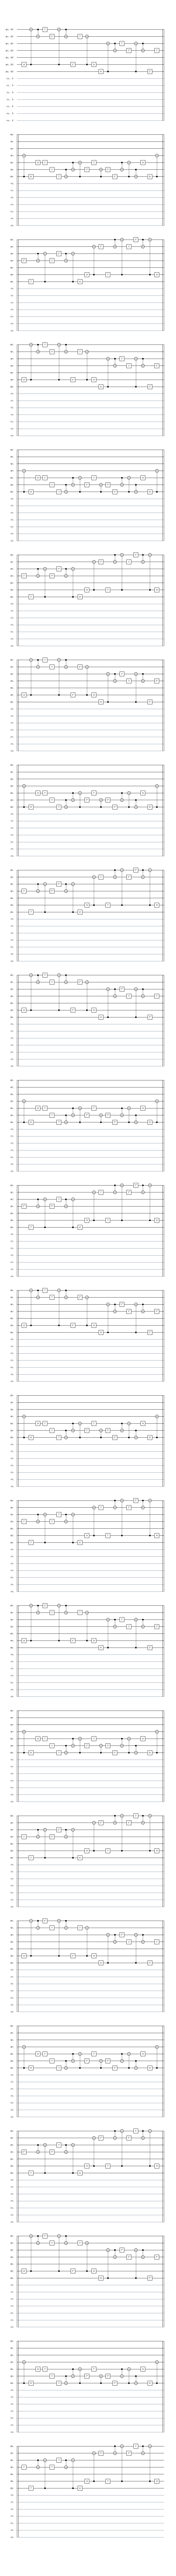

In [6]:
circuit_drawer(qc)

In [7]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.-0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.-0.j]])

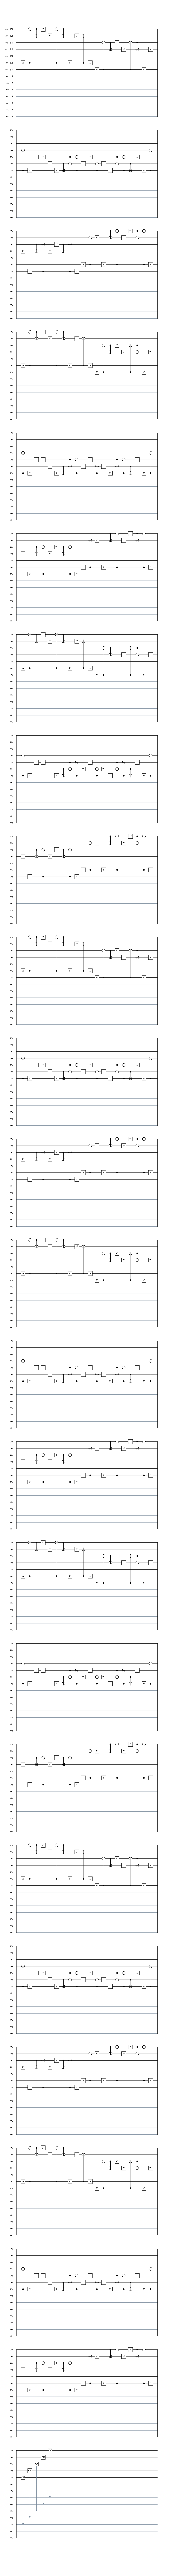

In [8]:
qc.barrier(qr[4])
qc.barrier(qr[3])
qc.barrier(qr[2])
qc.barrier(qr[1])
qc.barrier(qr[0])

qc.measure(qr[4],cr[4])
qc.measure(qr[3],cr[3])
qc.measure(qr[2],cr[2])
qc.measure(qr[1],cr[1])
qc.measure(qr[0],cr[0])

circuit_drawer(qc)

In [9]:
qp.get_circuit_names()

['Circuit']

In [10]:
# QASM from a program

QASM_source = qp.get_qasm('Circuit')

print(QASM_source)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[7];
creg cr[7];
h qr[5];
cx qr[5],qr[0];
cx qr[0],qr[1];
t qr[0];
tdg qr[1];
cx qr[5],qr[0];
cx qr[0],qr[1];
tdg qr[5];
t qr[1];
cx qr[5],qr[1];
h qr[5];
h qr[6];
cx qr[6],qr[2];
cx qr[2],qr[3];
t qr[2];
tdg qr[3];
cx qr[6],qr[2];
cx qr[2],qr[3];
tdg qr[6];
t qr[3];
cx qr[6],qr[3];
h qr[6];
h qr[4];
t qr[4];
t qr[5];
t qr[6];
cx qr[5],qr[6];
cx qr[4],qr[5];
cx qr[6],qr[4];
tdg qr[5];
t qr[4];
cx qr[6],qr[5];
tdg qr[5];
tdg qr[6];
cx qr[4],qr[5];
cx qr[6],qr[4];
cx qr[5],qr[6];
h qr[4];
h qr[6];
cx qr[6],qr[3];
tdg qr[3];
t qr[6];
cx qr[2],qr[3];
cx qr[6],qr[2];
t qr[3];
tdg qr[2];
cx qr[2],qr[3];
cx qr[6],qr[2];
h qr[6];
h qr[5];
cx qr[5],qr[1];
tdg qr[1];
t qr[5];
cx qr[0],qr[1];
cx qr[5],qr[0];
t qr[1];
tdg qr[0];
cx qr[0],qr[1];
cx qr[5],qr[0];
h qr[5];
barrier qr[5];
h qr[5];
cx qr[5],qr[0];
cx qr[0],qr[1];
t qr[0];
tdg qr[1];
cx qr[5],qr[0];
cx qr[0],qr[1];
tdg qr[5];
t qr[1];
cx qr[5],qr[1];
h qr[5];
barrier qr[6];
h qr[6];
cx qr[6],qr[

Status @ 0 seconds
{'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': None}
{'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': None}
{'0000000': 1024}


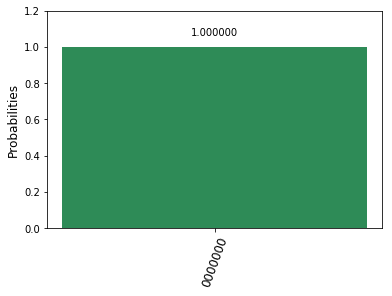

In [11]:
#other way complire and run:
job = execute(qc, backend='local_qasm_simulator', shots=1024, max_credits=3)

lapse = 0
interval = 5
while not job.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status)
    time.sleep(interval)
    lapse += 1
print(job.status)

print(job.result().get_counts(qc))
plot_histogram(job.result().get_counts(qc))

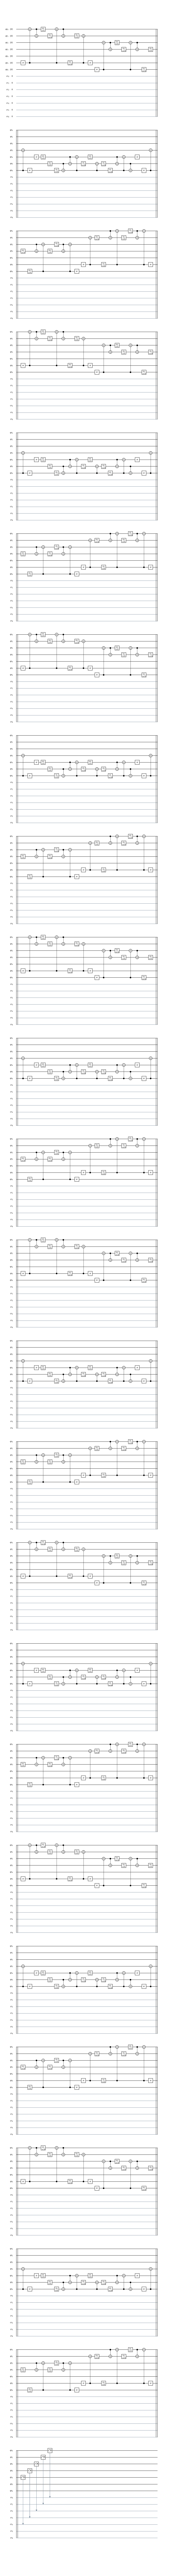

In [12]:
#the circuit running is not the one we write
qobj = compile(qc, backend='local_qasm_simulator')

qasm_str = qp.get_compiled_qasm(qobj, 'Circuit')

qasm_circ = qiskit.load_qasm_string(qasm_str);
circuit_drawer(qasm_circ)

In [13]:
print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[7];
creg cr[7];
h qr[5];
cx qr[5],qr[0];
cx qr[0],qr[1];
u1(0.785398163397448) qr[0];
u1(-0.785398163397448) qr[1];
cx qr[5],qr[0];
cx qr[0],qr[1];
u1(-0.785398163397448) qr[5];
u1(0.785398163397448) qr[1];
cx qr[5],qr[1];
h qr[5];
h qr[6];
cx qr[6],qr[2];
cx qr[2],qr[3];
u1(0.785398163397448) qr[2];
u1(-0.785398163397448) qr[3];
cx qr[6],qr[2];
cx qr[2],qr[3];
u1(-0.785398163397448) qr[6];
u1(0.785398163397448) qr[3];
cx qr[6],qr[3];
h qr[6];
h qr[4];
u1(0.785398163397448) qr[4];
u1(0.785398163397448) qr[5];
u1(0.785398163397448) qr[6];
cx qr[5],qr[6];
cx qr[4],qr[5];
cx qr[6],qr[4];
u1(-0.785398163397448) qr[5];
u1(0.785398163397448) qr[4];
cx qr[6],qr[5];
u1(-0.785398163397448) qr[5];
u1(-0.785398163397448) qr[6];
cx qr[4],qr[5];
cx qr[6],qr[4];
cx qr[5],qr[6];
h qr[4];
h qr[6];
cx qr[6],qr[3];
u1(-0.785398163397448) qr[3];
u1(0.785398163397448) qr[6];
cx qr[2],qr[3];
cx qr[6],qr[2];
u1(0.785398163397448) qr[3];
u1(-0.785398163397448) qr[2

# Running on real device

In [14]:
def lowest_pending_jobs():
    """Returns the backend with lowest pending jobs."""
    list_of_backends = available_backends(
        {'local': False, 'simulator': False})
    device_status = [get_backend(backend).status
                     for backend in list_of_backends]

    best = min([x for x in device_status if x['operational'] is True],
               key=lambda x: x['pending_jobs'])
    return best['name']

backend = lowest_pending_jobs()
print("The best backend is " + backend)

The best backend is ibmqx5


In [15]:
#to this case we need ibmqx5 - 16 qubits
backend = 'ibmqx5'
api.backend_status(backend)

{'available': True, 'backend': 'ibmqx5', 'pending_jobs': 15}

In [16]:
api.backend_calibration(backend)

{'backend': 'ibmqx5',
 'lastUpdateDate': '2018-08-15T11:44:46.000Z',
 'multiQubitGates': [{'gateError': {'date': '2018-08-15T11:11:58Z',
    'value': 0.03976789467572084},
   'name': 'CX1_0',
   'qubits': [1, 0],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-15T11:11:58Z', 'value': 0.04259136061573582},
   'name': 'CX1_2',
   'qubits': [1, 2],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-15T11:11:58Z', 'value': 0.04689156023448646},
   'name': 'CX2_3',
   'qubits': [2, 3],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-15T11:11:58Z', 'value': 0.03763504291162942},
   'name': 'CX3_4',
   'qubits': [3, 4],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-15T11:44:46Z', 'value': 0.06497451042655555},
   'name': 'CX3_14',
   'qubits': [3, 14],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-15T11:11:58Z', 'value': 0.0318316471912545},
   'name': 'CX5_4',
   'qubits': [5, 4],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-15T11:11:58Z',
    'value': 0.039239297

In [17]:
api.backend_parameters(backend)

{'backend': 'ibmqx5',
 'fridgeParameters': {'Temperature': {'date': '2018-08-15T03:52:29Z',
   'unit': 'K',
   'value': 0.0144237},
  'cooldownDate': '2017-09-15'},
 'lastUpdateDate': '2018-08-15T10:29:02.000Z',
 'qubits': [{'T1': {'date': '2018-08-15T10:27:59Z',
    'unit': 'µs',
    'value': 44.3},
   'T2': {'date': '2018-08-15T10:29:02Z', 'unit': 'µs', 'value': 20.8},
   'buffer': {'date': '2018-08-15T10:05:08Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2018-08-15T10:05:08Z',
    'units': 'GHz',
    'value': 5.2559176},
   'gateTime': {'date': '2018-08-15T10:05:08Z', 'unit': 'ns', 'value': 80},
   'name': 'Q0'},
  {'T1': {'date': '2018-08-15T10:27:59Z', 'unit': 'µs', 'value': 38.6},
   'T2': {'date': '2018-08-15T10:29:02Z', 'unit': 'µs', 'value': 61.1},
   'buffer': {'date': '2018-08-15T10:05:08Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2018-08-15T10:05:08Z',
    'units': 'GHz',
    'value': 5.3960051},
   'gateTime': {'date': '2018-08-15T10:05:08Z', 'uni

In [18]:
qobj = compile(qc, backend=backend)

qs_str = qp.get_compiled_qasm(qobj, 'Circuit')

qs_circ = qiskit.load_qasm_string(qs_str);
circuit_drawer(qs_circ)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd992c73e18> (for post_execute):


ValueError: Image size of 1384x157543 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1384x157543 pixels is too large. It must be less than 2^16 in each direction.

In [19]:
print(qs_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[16];
creg cr[7];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[13];
u2(0,3.14159265358979) q[3];
cx q[15],q[14];
cx q[2],q[3];
cx q[1],q[0];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[15];
cx q[15],q[14];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[15];
cx q[15],q[14];
u2(0,3.92699081698724) q[15];
cx q[13],q[14];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[3];
u2(0,3.14159265358979) q[2];
cx q[2],q[3];
u2(0,3.14159265358979) q[3];
u2(0,3.14159265358979) q[2];
cx q[2],q[3];
u2(0,3.14159265358979) q[3];
cx q[3],q[14];
u2(0.785398163397448,3.14159265358979) q[14];
cx q[13],q[14];
u1(-0.785398163397448) q[13];
u2(0,3.14159265358979) q[14];
u3(0.785398163397448,1.57079632679490,4.71238898038469) q[3];
cx q[3],q[14];
u2(0,3.14159265358979) q[14];
u2(0.785398163397448,3.14159265358979) q[3];
cx q[3],q[14];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[3];
cx q[3],q[14];
u2(0,3.14159265358979) q[14]

In [20]:
shots=1024
max_credits=3
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)

lapse = 0
interval = 10
while not job_exp.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status)
    time.sleep(interval)
    lapse += 1
print(job_exp.status)

Status @ 0 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 10 seconds
{'job_id': '5b74bb7c3f516200393c8209', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 16}
Status @ 20 seconds
{'job_id': '5b74bb7c3f516200393c8209', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 15}
Status @ 30 seconds
{'job_id': '5b74bb7c3f516200393c8209', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 14}
Status @ 40 seconds
{'job_id': '5b74bb7c3f516200393c8209', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 14}
Status @ 50 seconds
{'job_id': '5b74bb7c3f516200393c8209', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 13}
Status @ 60 seconds
{'job_id': '5b74bb7c3f51

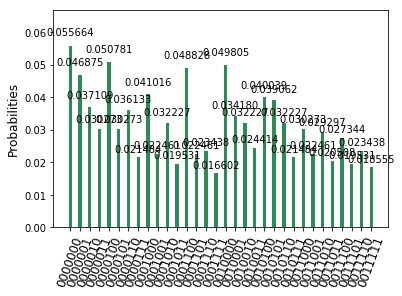

In [21]:
plot_histogram(job_exp.result().get_counts(qc))

In [22]:
job_exp.result().get_data('Circuit')

{'counts': {'0000000': 57,
  '0000001': 48,
  '0000010': 38,
  '0000011': 31,
  '0000100': 52,
  '0000101': 31,
  '0000110': 37,
  '0000111': 22,
  '0001000': 42,
  '0001001': 23,
  '0001010': 33,
  '0001011': 20,
  '0001100': 50,
  '0001101': 23,
  '0001110': 24,
  '0001111': 17,
  '0010000': 51,
  '0010001': 35,
  '0010010': 33,
  '0010011': 25,
  '0010100': 41,
  '0010101': 40,
  '0010110': 33,
  '0010111': 22,
  '0011000': 31,
  '0011001': 23,
  '0011010': 30,
  '0011011': 21,
  '0011100': 28,
  '0011101': 20,
  '0011110': 24,
  '0011111': 19},
 'date': '2018-08-15T23:54:22.262Z',
 'time': 24.666361093521118}